<a href="https://colab.research.google.com/github/Sahil-1509/Machine_Learning_Projects/blob/main/Speech_Emotion_Recognition_07_03_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**TODOs:**

1.   pad the audio lengths to mean lengths
2.   learn about CNN

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
***importing modules***

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa.display as lid
import librosa as lib
import re #regex
import random
from google.colab import drive
import math as math 
from scipy.signal import find_peaks
from tqdm import tqdm

---

***Storing Files***



*the data is stored inside Files-> content- > gdrive*

---

In [ ]:
# from google.colab import files
# uploaded = files.upload()

drive.mount('/content/gdrive')


Mounted at /content/gdrive


---

***Uncompressing Files***

content -> Speech -> Emotion Recognition Sound Files

---

In [ ]:
#download dataset from here: https://drive.google.com/file/d/167ehjVSa88kapmBbPzhleiGI3s6YoPFC/view?usp=sharing

# RAWDATAPATH= "/content/gdrive/MyDrive/Machine\ Learning/Speech\ Emotion\ Recognition/dataverse_files.zip"
RAWDATAPATH= "/content/gdrive/MyDrive/dataverse_files.zip"
DESTINATIONPATH='/content/Speech\ Emotion\ Recognition\ Sound\ Files'

# !rm -r /content/destination_path #removes a non-empty folder recursively

!unzip $RAWDATAPATH -d $DESTINATIONPATH

Archive:  /content/gdrive/MyDrive/dataverse_files.zip
  inflating: /content/Speech Emotion Recognition Sound Files/OAF_back_angry.wav  
  inflating: /content/Speech Emotion Recognition Sound Files/OAF_back_disgust.wav  
  inflating: /content/Speech Emotion Recognition Sound Files/OAF_back_fear.wav  
  inflating: /content/Speech Emotion Recognition Sound Files/OAF_back_happy.wav  
  inflating: /content/Speech Emotion Recognition Sound Files/OAF_back_neutral.wav  
  inflating: /content/Speech Emotion Recognition Sound Files/OAF_back_ps.wav  
  inflating: /content/Speech Emotion Recognition Sound Files/OAF_back_sad.wav  
  inflating: /content/Speech Emotion Recognition Sound Files/OAF_bar_angry.wav  
  inflating: /content/Speech Emotion Recognition Sound Files/OAF_bar_disgust.wav  
  inflating: /content/Speech Emotion Recognition Sound Files/OAF_bar_fear.wav  
  inflating: /content/Speech Emotion Recognition Sound Files/OAF_bar_happy.wav  
  inflating: /content/Speech Emotion Recognition 

---

***Making a dataset***

---

In [ ]:
#reading the MANIFEST.TXT file for sound file names
DESTINATIONdirectory = '/content/Speech Emotion Recognition Sound Files'
f = open(DESTINATIONdirectory+"/MANIFEST.TXT", "r")

#defining a dictionary
dataset={
        'filename': [],
        'format': [],
         'emotion': [],
         'actor': [],
         'size': []
        }

#iterating through the file
for mani_info in f:
  # print(mani_info)
  info_list = re.split('[()]', mani_info[:-2])
  # print(info_list)
  fn=info_list[0].strip()
  # print(fn)
  dataset['filename'].append(fn) #pushing file names
  dataset['format'].append(info_list[1].strip())
  dataset['size'].append(info_list[2].strip())
  dataset['emotion'].append(fn[fn.rindex('_') + 1 : fn.rindex('.')]) 

  if (info_list[0][0] == 'O'):
    dataset['actor'].append('old')
  else:
    dataset['actor'].append('young')
  

#making a panda dataframe out of the dictionary
df = pd.DataFrame(dataset)
print(df)

                   filename     format  emotion  actor          size
0        OAF_back_angry.wav  audio/wav    angry    old   75204 bytes
1      OAF_back_disgust.wav  audio/wav  disgust    old  110424 bytes
2         OAF_back_fear.wav  audio/wav     fear    old   84388 bytes
3        OAF_back_happy.wav  audio/wav    happy    old   97758 bytes
4      OAF_back_neutral.wav  audio/wav  neutral    old   99832 bytes
...                     ...        ...      ...    ...           ...
2795     YAF_youth_fear.wav  audio/wav     fear  young   85252 bytes
2796    YAF_youth_happy.wav  audio/wav    happy  young  103130 bytes
2797  YAF_youth_neutral.wav  audio/wav  neutral  young  105210 bytes
2798       YAF_youth_ps.wav  audio/wav       ps  young   86760 bytes
2799      YAF_youth_sad.wav  audio/wav      sad  young  116028 bytes

[2800 rows x 5 columns]


---

***Randomized Selection Process***

---

In [ ]:
randomIndex = random.randint(0, df.shape[0]-1)
print(df['filename'][randomIndex])



OAF_fail_fear.wav


---

***Plotting The Time vs Amplitude***

---

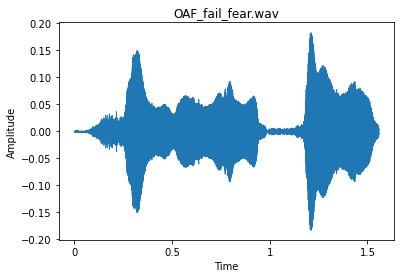

In [ ]:
data, sampling_rate = lib.load(DESTINATIONdirectory + "/"+ df['filename'][randomIndex], sr=44100)  #default sampling rate(sr) = 22050

emot = df['emotion'][randomIndex]
lid.waveshow(data, sampling_rate)

plt.title(df['filename'][randomIndex])
plt.xlabel("Time")
plt.ylabel("Amplitude")
# plt.savefig('amplitude vs time', dpi=500)
plt.show()
# print(data)

---

***Performing Fourier Transform on the above plot to convert into time-frequency domain***

---

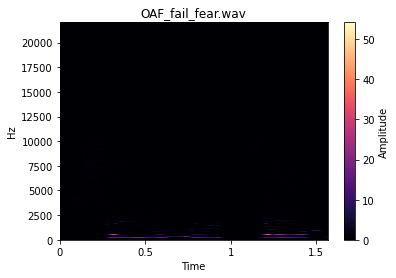

In [ ]:
data_stft = np.abs(lib.stft(data)) #Short-time Fourier transform
lid.specshow(data_stft, sr=sampling_rate, x_axis='time', y_axis='linear');
plt.colorbar(label="Amplitude")
plt.title(df['filename'][randomIndex])
# plt.savefig('freq vs time', dpi=500)
plt.show()

---

***Applying log scale on the data***

signal measured in decibles now

---

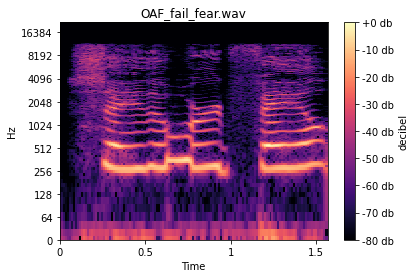

In [ ]:
data_stft_db = lib.amplitude_to_db(data_stft, ref=np.max)
lid.specshow(data_stft_db, sr=sampling_rate, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f db', label="decibel")
plt.title(df['filename'][randomIndex])
# plt.savefig('spectogram', dpi=500)
plt.show()

***Spectral Envelope***

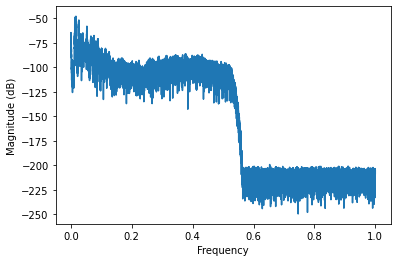

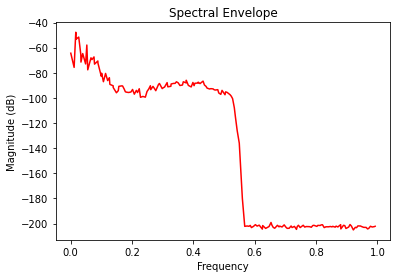

In [ ]:
arr=np.array([])
arr= plt.magnitude_spectrum(data, scale='dB')
# plt.savefig('spectrum', dpi=500)
plt.show()

# plt.plot(arr[1], 20*np.log10(arr[0]), 'r')
# plt.show()

window_size = int(arr[0].size / 180)
starting = 0
coords = {"y_coord": [], "x_coord": []}

for mag in range(window_size, arr[0].size, window_size):
 
  temp_arr = 20*np.log10(arr[0][starting:mag])
 
  max_value = np.max(temp_arr)
  y_coord = max_value;
  index = np.where( temp_arr == max_value)[0]
  x_coord = arr[1][index + starting][0]

  coords['y_coord'].append(y_coord)
  coords['x_coord'].append(x_coord)

  starting=mag


plt.plot(coords['x_coord'], coords['y_coord'], 'r')
plt.xlabel('Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('Spectral Envelope')
# plt.savefig('spectral_envelope', dpi=500)
plt.show()


# for spectral envelope https://stackoverflow.com/questions/30889748/how-to-obtain-sound-envelope-using-python
#https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520

***Peak Finding in Envelope***

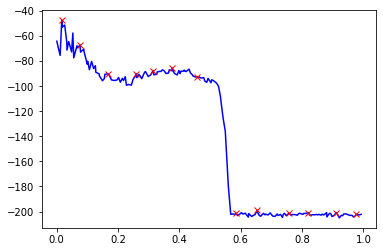

In [ ]:
# https://stackoverflow.com/questions/4624970/finding-local-maxima-minima-with-numpy-in-a-1d-numpy-array
# from scipy.signal import find_peaks
peaks, _ = find_peaks(coords['y_coord'], distance=10)
plt.plot(coords['x_coord'], coords['y_coord'], 'b') #activate this


peaks_x = np.array([coords['x_coord'][n] for n in peaks])
peaks_y = np.array([coords['y_coord'][n] for n in peaks])

plt.plot(peaks_x, peaks_y, 'xr') #activate this


coordinates = np.vstack((peaks_x, peaks_y))



***MFCC Calculation***

In [ ]:
### in their given code they are converting ALL of their data sets to mfccs thats why they have a loop over here 

# for i in tqdm(X):
mfcc = lib.feature.mfcc(data, sr=44100, n_mfcc=20)
mfcc = mfcc.T


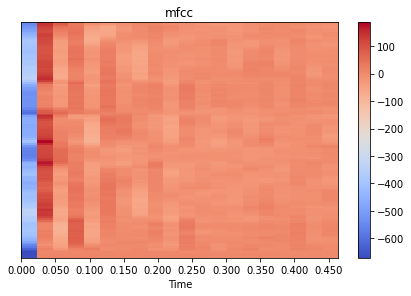

In [ ]:
# print(mfcc.shape)
lid.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.title('mfcc')
plt.show()

In [ ]:
RAWDATAPATH= "/content/gdrive/MyDrive/TESS_Spectrograms.zip"
DESTINATIONPATH='/content/Input\ Sound\ Emotion\ Files'

# !rm -r /content/destination_path #removes a non-empty folder recursively

!unzip $RAWDATAPATH -d $DESTINATIONPATH


Archive:  /content/gdrive/MyDrive/TESS_Spectrograms.zip
  inflating: /content/Input Sound Emotion Files/spectrograms/OAF_back_angry.png  
  inflating: /content/Input Sound Emotion Files/spectrograms/OAF_back_disgust.png  
  inflating: /content/Input Sound Emotion Files/spectrograms/OAF_back_fear.png  
  inflating: /content/Input Sound Emotion Files/spectrograms/OAF_back_happy.png  
  inflating: /content/Input Sound Emotion Files/spectrograms/OAF_back_neutral.png  
  inflating: /content/Input Sound Emotion Files/spectrograms/OAF_back_ps.png  
  inflating: /content/Input Sound Emotion Files/spectrograms/OAF_back_sad.png  
  inflating: /content/Input Sound Emotion Files/spectrograms/OAF_bar_angry.png  
  inflating: /content/Input Sound Emotion Files/spectrograms/OAF_bar_disgust.png  
  inflating: /content/Input Sound Emotion Files/spectrograms/OAF_bar_fear.png  
  inflating: /content/Input Sound Emotion Files/spectrograms/OAF_bar_happy.png  
  inflating: /content/Input Sound Emotion Files

In [ ]:
import glob
import cv2
import os
from google.colab.patches import cv2_imshow

In [ ]:
images = []
labels = [] 
for directory_path in glob.glob("../content/Input Sound Emotion Files/spectrograms*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
  
images = np.array(images)


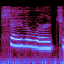

In [ ]:
cv2_imshow(images[1])
# imshow(test_images[1])

In [ ]:
y=[]
for i in range(1129):
  y.append(df['emotion'][i])

print(y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
labels=y
labels
from collections import Counter
items = Counter(y).keys()
print(len(items))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad', 'angry', 'disgust', 'fear', 'happy

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 1)
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(903, 224, 224, 3)
(226, 224, 224, 3)
(903,)
(226,)


In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(903, 224, 224, 3)
(226, 224, 224, 3)
(903, 7)
(226, 7)


In [ ]:
from keras.callbacks import    EarlyStopping

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=7, activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
es = EarlyStopping(monitor='accuracy', mode='max', patience=2,  restore_best_weights=True)
cnn.fit(X_train,y_train , epochs = 15,batch_size=5,callbacks=es)


Epoch 1/15
181/181 [==============================] - 74s 399ms/step - loss: 69.7500 - accuracy: 0.1506
Epoch 2/15
181/181 [==============================] - 71s 394ms/step - loss: 1.5221 - accuracy: 0.4839
Epoch 3/15
181/181 [==============================] - 72s 397ms/step - loss: 0.4635 - accuracy: 0.8782
Epoch 4/15
181/181 [==============================] - 70s 386ms/step - loss: 0.0732 - accuracy: 0.9856
Epoch 5/15
139/181 [======================>.......] - ETA: 17s - loss: 0.0132 - accuracy: 0.9986

KeyboardInterrupt: ignored

In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test, verbose=1)
loss_v, accuracy_v = cnn.evaluate(X_train, y_train, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))


29/29 [==============================] - 14s 476ms/step - loss: 0.0019 - accuracy: 1.0000
Validation: accuracy = 1.000000  ;  loss_v = 0.001933
Test: accuracy = 0.115044  ;  loss = 4.466971


In [ ]:
import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

model1 = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
model1.trainable = False

X_train = preprocess_input(X_train) 
X_test = preprocess_input(X_test)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
model1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(7, activation='softmax')


model_vgg = models.Sequential([
    model1,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

from keras.callbacks import EarlyStopping

model_vgg.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=2,  restore_best_weights=True)

model_vgg.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/15
18/23 [======================>.......] - ETA: 1:21 - loss: 13.8782 - accuracy: 0.1441

KeyboardInterrupt: ignored

In [ ]:
import keras
from tensorflow.keras.applications.resnet50 import ResNet50,decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input

model2 = ResNet50(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
model2.trainable = False


In [ ]:
model2.summary()

In [ ]:
from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(7, activation='softmax')


model_res = models.Sequential([
    model2,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

from keras.callbacks import EarlyStopping

model_res.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=2,  restore_best_weights=True)

model_res.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=32, callbacks=[es])

In [ ]:
from tensorflow.keras.applications import VGG16 ,VGG19
Resnet50,DenseNet121,EfficientNetB0,

